In [ ]:
# Importing the required libraries
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
# Assuming you have prepared your dataset and loaded it into features and labels
df = pd.read_csv('/content/drive/MyDrive/dataset_sdn.csv')

In [ ]:
df.dtypes


dt               int64
switch           int64
src             object
dst             object
pktcount         int64
bytecount        int64
dur              int64
dur_nsec         int64
tot_dur        float64
flows            int64
packetins        int64
pktperflow       int64
byteperflow      int64
pktrate          int64
Pairflow         int64
Protocol        object
port_no          int64
tx_bytes         int64
rx_bytes         int64
tx_kbps          int64
rx_kbps        float64
tot_kbps       float64
label            int64
dtype: object

In [ ]:
# Dropping the specified columns
df = df.drop(columns=['src', 'dst'],axis=1)

In [ ]:
df.head()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


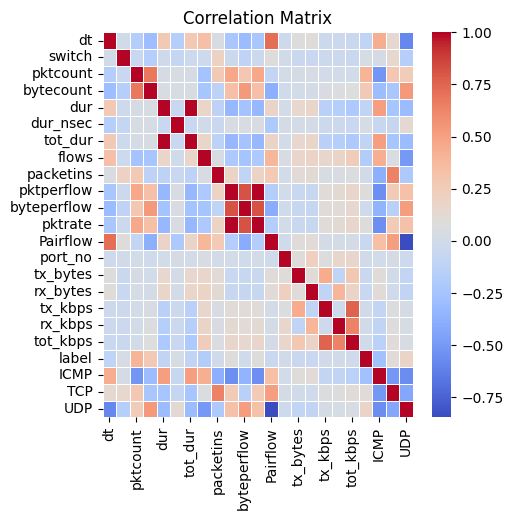

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
print(df['Protocol'].unique())

['UDP' 'TCP' 'ICMP']


In [ ]:
dummies=pd.get_dummies(df['Protocol'])
df=pd.concat([df.drop('Protocol',axis=1),dummies],axis=1)


In [ ]:
df.head()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,...,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label,ICMP,TCP,UDP
0,11425,1,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,...,3,143928631,3917,0,0.0,0.0,0,0,0,1
1,11605,1,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,...,4,3842,3520,0,0.0,0.0,0,0,0,1
2,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,1,3795,1242,0,0.0,0.0,0,0,0,1
3,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,2,3688,1492,0,0.0,0.0,0,0,0,1
4,11425,1,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,...,3,3413,3665,0,0.0,0.0,0,0,0,1


In [ ]:
df.dtypes

dt               int64
switch           int64
pktcount         int64
bytecount        int64
dur              int64
dur_nsec         int64
tot_dur        float64
flows            int64
packetins        int64
pktperflow       int64
byteperflow      int64
pktrate          int64
Pairflow         int64
port_no          int64
tx_bytes         int64
rx_bytes         int64
tx_kbps          int64
rx_kbps        float64
tot_kbps       float64
label            int64
ICMP             uint8
TCP              uint8
UDP              uint8
dtype: object

In [ ]:
null_values = df.isnull().sum()
# Print the count of null values
print(null_values)

dt               0
switch           0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        504
tot_kbps       504
label            0
ICMP             0
TCP              0
UDP              0
dtype: int64


In [ ]:
df['rx_kbps']=df['rx_kbps'].fillna(df['rx_kbps'].median())
df['tot_kbps']=df['tot_kbps'].fillna(df['tot_kbps'].median())

In [ ]:
null_values = df.isnull().sum()
# Print the count of null values
print(null_values)

dt             0
switch         0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
ICMP           0
TCP            0
UDP            0
dtype: int64


In [ ]:
x = df.drop(columns=["label"])
y = df["label"]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Creating a Extra Trees classifier
clf = ExtraTreesClassifier()

# Training the classifier
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9997603068072867


Splitting using Train Test 80-20 and finding the accuracy

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/streamData.csv')

In [ ]:
print(dataset['Protocol'].unique())

['UDP' 'ICMP' 'TCP']


In [ ]:
dummies=pd.get_dummies(dataset['Protocol'])
dataset=pd.concat([dataset.drop('Protocol',axis=1),dummies],axis=1)

In [ ]:
columns_to_drop = ['src', 'dst']

# Dropping the specified columns
dataset = dataset.drop(columns=columns_to_drop)

In [ ]:
dataset.dtypes

dt               int64
switch           int64
pktcount         int64
bytecount        int64
dur              int64
dur_nsec         int64
tot_dur        float64
flows            int64
packetins        int64
pktperflow       int64
byteperflow      int64
pktrate          int64
Pairflow         int64
port_no          int64
tx_bytes         int64
rx_bytes         int64
tx_kbps          int64
rx_kbps          int64
tot_kbps         int64
label            int64
ICMP             uint8
TCP              uint8
UDP              uint8
dtype: object

In [ ]:
# loading the datastream values one by one into ra for prediction and storing the values
l=list()
t=list()
for i in range(1,dataset.shape[0]):
  ra = dataset.iloc[i]
  l.append(ra.loc["label"])
  ra=ra.drop('label')
  y_pred=clf.predict([ra])
  t.append(y_pred[0])
print(l)
print(t)

In [ ]:
# using the predicted values, calculating the accuracy
c=0
a=0

for i in range(1,len(t)):
  if t[i]==l[i]:
    c=c+1
    if t[i]==1:
      a=a+1;
      # block protocol
print(a, "Bots found out of", len(l), "packets")
print(c)
print(len(l))
print("Accuracy is: ", c/len(l))


84 Bots found out of 243 packets
242
243
Accuracy is:  0.9958847736625515


Splitting Manually and Finding the accuracy
created a excel dataset(streamData with 200 rows and delete the same in the df(dataset_sdn)


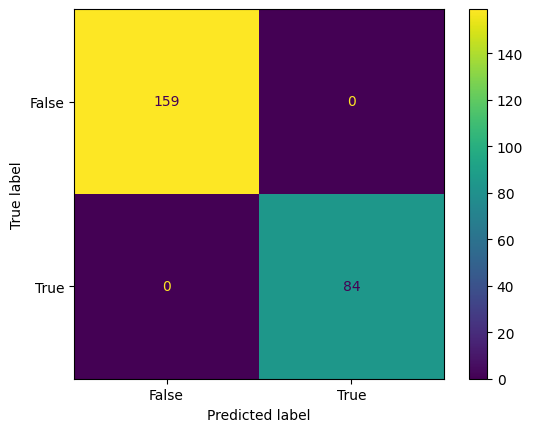

In [ ]:
#Confusion Matrix

import matplotlib.pyplot as plt
from sklearn import metrics

actual = l
predicted = t

cm = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()


AUC-ROC score: 1.0


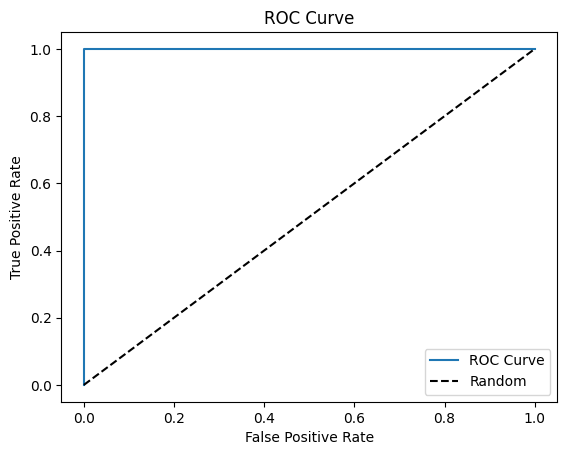

In [ ]:
#AUC-ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

auc_roc = roc_auc_score(l, t)
print("AUC-ROC score:", auc_roc)

#Assuming you have the true labels and predicted probabilities available
fpr, tpr, thresholds = roc_curve(l,t)

#Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
